In [26]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import random
import math
import time
import func3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device1)

Using device: cuda


## Problem 1:

In [4]:
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_x = torch.Tensor( testset.data ) / 256.0 - 0.5
test_x = test_x.to(device)
test_y = torch.Tensor( testset.targets ).long()
test_y = test_y.to(device)
train_x = torch.Tensor( trainset.data ) / 256.0 - 0.5
train_x = train_x.to(device)
train_y = torch.Tensor( trainset.targets ).long()
train_y = train_y.to(device)


In [5]:
linearModel = func3.LinearSoftmaxRegression()
func3.trainNetwork(linearModel, device, train_x, train_y, test_x, test_y, nn.CrossEntropyLoss(), optim.Adam, 256, 0.0004)

epochs: 1 total Loss over Batches: 293.59635639190674 test loss: 2.347092866897583
epochs: 2 total Loss over Batches: 149.0468808412552 test loss: 0.7462728023529053
epochs: 3 total Loss over Batches: 117.36150589585304 test loss: 0.5253244638442993
epochs: 4 total Loss over Batches: 103.05949088931084 test loss: 0.44046932458877563
epochs: 5 total Loss over Batches: 94.2980645596981 test loss: 0.39662855863571167
epochs: 6 total Loss over Batches: 88.4426130503416 test loss: 0.37158989906311035
epochs: 7 total Loss over Batches: 84.29792483150959 test loss: 0.35245928168296814
epochs: 8 total Loss over Batches: 83.55998645722866 test loss: 0.3370494544506073
epochs: 9 total Loss over Batches: 79.34677901864052 test loss: 0.32740485668182373
epochs: 10 total Loss over Batches: 78.12292777001858 test loss: 0.32078662514686584
epochs: 11 total Loss over Batches: 74.4764364361763 test loss: 0.3151138126850128
epochs: 12 total Loss over Batches: 75.47636982798576 test loss: 0.3096737563610

(27.849001169204712, 0.2849067449569702, 0.2832958400249481)

In [ ]:
def imshow(img):
    img = img /256
    plt.imshow( img )
    plt.show()

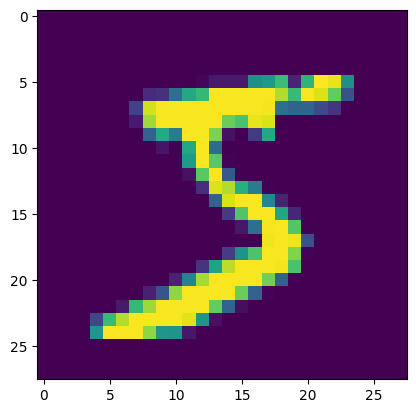

tensor(5)
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   

tensor([[1.4053e-03, 2.9106e-05, 2.6854e-03,  ..., 3.7449e-03, 1.8943e-03,
         1.1021e-03],
        [9.9956e-01, 1.3092e-09, 1.6177e-05,  ..., 5.2273e-06, 1.9228e-05,
         6.5813e-06],
        [1.2406e-04, 3.3374e-04, 1.1604e-02,  ..., 1.1036e-02, 2.2267e-03,
         2.3497e-02],
        ...,
        [4.6947e-05, 4.6343e-05, 2.0140e-06,  ..., 2.3951e-04, 1.0424e-02,
         2.3856e-03],
        [2.0943e-02, 3.5091e-05, 8.1279e-03,  ..., 1.5488e-03, 4.0322e-04,
         1.9062e-03],
        [5.9250e-02, 5.9296e-05, 7.9613e-03,  ..., 2.1470e-03, 7.6982e-01,
         1.0502e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [37]:
imshow(trainset.data[0])
print(trainset.targets[0])
print(trainset.data[0])
torch.softmax(linearModel.forward(train_x), dim=1)

In [125]:
for j in range(10):
    picTry = torch.rand((1,28, 28), requires_grad = True, device=device)
    normalizer = nn.LayerNorm((28,28)).to(device)
    optimizer = optim.Adam([picTry], lr = 0.001 )
    relu = nn.ReLU().to(device)
    for i in range(100000):
        optimizer.zero_grad()
        loss = torch.nn.CrossEntropyLoss()(linearModel(normalizer(relu(picTry))-0.5),torch.tensor([j], device=device))
        loss.backward()
        optimizer.step()
        if i % 10000 == 0 and False:
            imshow(256*picTry[0].cpu().detach().numpy())
            # imshow(nn.LayerNorm((28,28)).to(device)(picTry)[0].cpu().detach().numpy())
            print(picTry)
            print(loss.item())
    imshow(256*picTry[0].cpu().detach().numpy())

KeyboardInterrupt: 

In [103]:
bestModel = func3.badVGGDec()
func3.trainNetwork(bestModel, device, train_x, train_y, test_x, test_y, nn.CrossEntropyLoss(), optim.Adam, 256, 0.0004)

epochs: 1 total Loss over Batches: 122.74586430191994 test loss: 2.436753988265991
epochs: 2 total Loss over Batches: 44.48086214065552 test loss: 0.23532478511333466
epochs: 3 total Loss over Batches: 31.69486066326499 test loss: 0.15888604521751404
epochs: 4 total Loss over Batches: 25.776481885463 test loss: 0.12846139073371887
epochs: 5 total Loss over Batches: 22.01409498229623 test loss: 0.12220605462789536
epochs: 6 total Loss over Batches: 17.9239540155977 test loss: 0.10525292903184891
epochs: 7 total Loss over Batches: 17.88166761212051 test loss: 0.10100939869880676
epochs: 8 total Loss over Batches: 15.064510123804212 test loss: 0.09146159887313843
epochs: 9 total Loss over Batches: 13.087287651374936 test loss: 0.08607436716556549
epochs: 10 total Loss over Batches: 13.39373535476625 test loss: 0.0882796049118042
epochs: 11 total Loss over Batches: 11.919213471002877 test loss: 0.09324418008327484
epochs: 12 total Loss over Batches: 10.436224413104355 test loss: 0.08381938

(40.830997705459595, 0.015312965959310532, 0.06551536917686462)

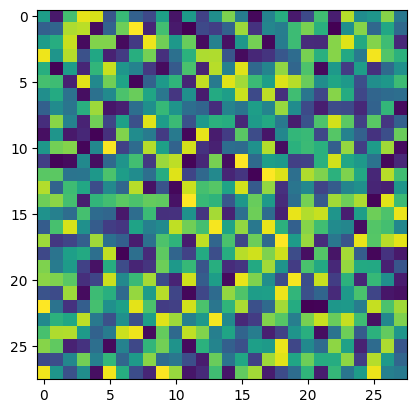

tensor([[[0.5587, 0.0716, 0.7016, 0.9646, 0.9399, 0.2708, 0.6746, 0.3141,
          0.2218, 0.5700, 0.0582, 0.5459, 0.1939, 0.4964, 0.8037, 0.4238,
          0.0238, 0.4451, 0.6246, 0.0762, 0.2267, 0.6946, 0.0851, 0.8907,
          0.4864, 0.5249, 0.8176, 0.4005],
         [0.3079, 0.3317, 0.8778, 0.8980, 0.0355, 0.3186, 0.7783, 1.0034,
          0.1097, 0.6995, 0.0727, 0.0052, 0.2214, 0.1874, 0.3216, 0.8540,
          0.1483, 0.4586, 0.4262, 0.6852, 0.7995, 0.6356, 0.0024, 0.4981,
          0.8200, 0.3345, 0.6014, 0.3447],
         [0.5554, 0.6227, 0.9164, 0.0300, 0.8117, 0.8115, 0.0303, 0.1731,
          0.9748, 0.7834, 0.5342, 0.7686, 0.0349, 0.4392, 0.0453, 0.5295,
          0.7901, 0.0255, 0.4202, 0.6866, 0.1266, 0.1226, 0.8206, 0.9518,
          0.6100, 0.8142, 0.6919, 0.1161],
         [0.9737, 0.5228, 0.8886, 0.2491, 0.5971, 0.0974, 0.1754, 0.6265,
          0.7922, 0.1410, 0.3711, 0.6404, 0.8782, 0.8803, 0.2645, 0.0331,
          0.1147, 0.1526, 0.2740, 0.3548, 0.7959, 0.6314,

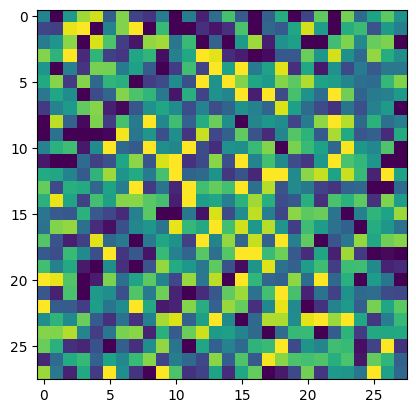

tensor([[[ 4.5353e-01, -3.7871e-02,  5.3773e-01,  8.5703e-01,  9.2867e-01,
           3.0480e-01,  8.0923e-01,  2.0404e-01,  1.5140e-01,  4.2134e-01,
          -6.7836e-02,  4.2466e-01,  9.4225e-02,  3.5799e-01,  7.0838e-01,
           2.9283e-01, -4.0669e-02,  3.0774e-01,  6.1777e-01, -4.9462e-02,
           2.0354e-01,  7.5299e-01, -2.1280e-05,  7.9098e-01,  3.5405e-01,
           5.7815e-01,  7.4688e-01,  5.1577e-01],
         [ 2.0884e-01,  1.8833e-01,  9.6135e-01,  1.0226e+00, -8.8825e-02,
           4.4730e-01,  8.1209e-01,  1.0535e+00, -1.7766e-02,  6.7338e-01,
          -3.7137e-02, -6.9267e-02,  1.4058e-01,  6.2641e-02,  1.4370e-01,
           7.1494e-01, -6.8709e-05,  3.3000e-01,  2.8019e-01,  5.8927e-01,
           9.3576e-01,  5.5608e-01, -7.1328e-02,  6.2519e-01,  6.8366e-01,
           2.5471e-01,  5.4618e-01,  4.3310e-01],
         [ 4.1994e-01,  5.2258e-01,  8.2625e-01, -4.4022e-02,  9.3880e-01,
           7.1834e-01,  1.8237e-01,  6.2046e-02,  8.3835e-01,  8.6113e-01,


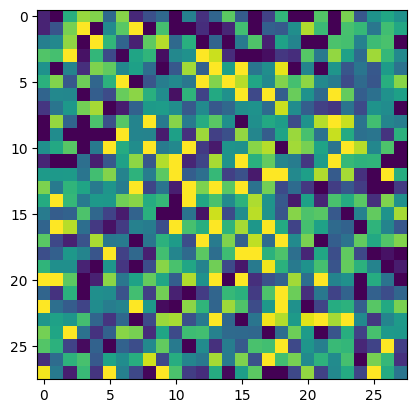

tensor([[[ 1.0010e-01, -3.7871e-02,  6.2783e-01,  8.4680e-01,  8.1246e-01,
           3.4151e-01,  8.1740e-01,  1.1767e-01,  2.4299e-01,  3.3945e-01,
          -6.7836e-02,  4.4107e-01,  1.4512e-01,  3.2629e-01,  7.4642e-01,
           2.9202e-01, -4.0669e-02,  1.9822e-01,  6.5913e-01, -4.9462e-02,
          -2.7381e-04,  7.3313e-01, -2.1280e-05,  7.9815e-01,  2.7030e-01,
           5.1317e-01,  5.9719e-01,  5.1082e-01],
         [ 1.0160e-01,  2.5952e-01,  7.9417e-01,  1.0226e+00, -8.8825e-02,
           4.8439e-01,  7.4265e-01,  1.0535e+00, -1.7766e-02,  7.0640e-01,
          -3.7137e-02, -6.9267e-02,  1.3353e-01,  2.2582e-03,  1.0771e-01,
           6.9799e-01, -6.8709e-05,  3.0606e-01,  2.8252e-01,  4.9507e-01,
           8.8277e-01,  6.8146e-01, -7.1328e-02,  7.0882e-01,  6.7017e-01,
           3.9685e-01,  6.9385e-01,  5.9854e-01],
         [ 4.3302e-01,  4.6907e-01,  8.3424e-01, -4.4022e-02,  1.0003e+00,
           6.5862e-01,  3.2369e-01,  9.3325e-02,  7.5403e-01,  8.8751e-01,


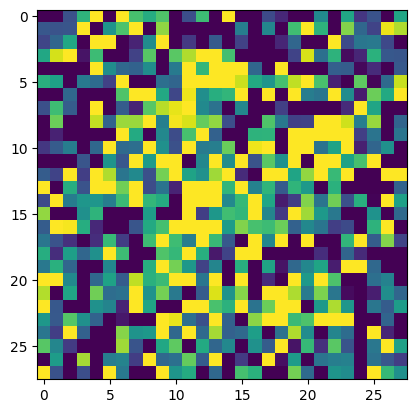

tensor([[[-1.1611e-03, -3.7871e-02,  2.4728e-01,  6.4998e-01,  1.2059e+00,
          -8.9204e-04,  1.3440e+00,  7.0970e-01,  6.2026e-01,  7.2567e-01,
          -6.7836e-02,  2.4090e-01,  6.8729e-01, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02,  2.2607e-01,  1.1373e-01, -4.9462e-02,
          -2.7381e-04,  4.7558e-01, -2.1280e-05,  5.9242e-01,  1.5840e-01,
           2.5549e-01, -3.1268e-02,  5.9157e-01],
         [ 2.7163e-01,  2.5816e-01,  2.6580e-01,  1.0226e+00, -8.8825e-02,
           5.1935e-01,  7.1676e-01,  1.0535e+00, -1.7766e-02,  8.3517e-01,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           4.2457e-01, -6.8709e-05,  4.6482e-01, -5.6920e-02,  6.9274e-01,
           1.0173e+00,  6.4771e-01, -7.1328e-02,  8.1326e-01,  3.3511e-01,
           2.0297e-01,  9.7041e-01,  8.8088e-01],
         [ 2.0867e-01,  3.2807e-01,  5.9654e-01, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01,  1.0151e-01,  4.8649e-01,  1.0317e+00,


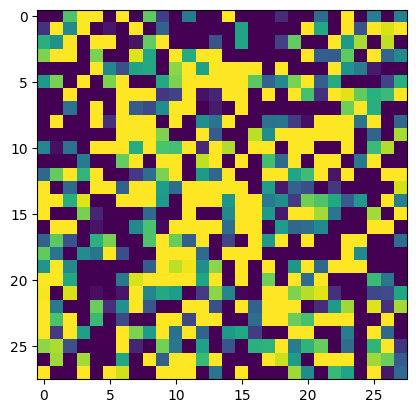

tensor([[[-1.1611e-03, -3.7871e-02,  7.2312e-01,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  7.5055e-01,  1.8451e-01,
          -6.7836e-02,  4.1178e-01, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  1.2072e-01, -4.9462e-02,
          -2.7381e-04,  3.5298e-01, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.2637e-01, -3.1268e-02,  4.3955e-01],
         [ 1.4252e-01,  1.0012e+00,  4.6985e-01,  1.0226e+00, -8.8825e-02,
           6.2811e-02, -1.9067e-03,  1.0535e+00, -1.7766e-02,  3.0653e-01,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           5.8468e-01, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00,  6.0530e-01, -7.1328e-02,  1.0017e+00,  2.5854e-01,
           1.0019e+00,  9.3757e-01,  1.0032e+00],
         [ 6.3110e-01,  5.0520e-01,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01,  5.5138e-02,  7.5902e-01,  1.0317e+00,


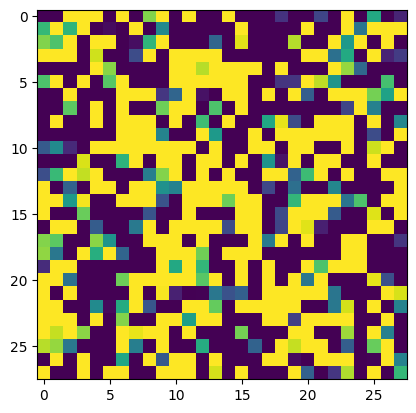

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  8.0978e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  1.4883e-01, -4.9462e-02,
          -2.7381e-04,  2.0950e-01, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           6.0442e-01, -3.1268e-02,  1.0451e-01],
         [ 6.6888e-01,  1.0012e+00,  6.5506e-01,  1.0226e+00, -8.8825e-02,
           3.1213e-02, -1.9067e-03,  1.0535e+00, -1.7766e-02,  4.7562e-01,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  3.9046e-01,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 8.1167e-01,  7.2209e-01,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01,  3.9752e-02,  6.5450e-01,  1.0317e+00,


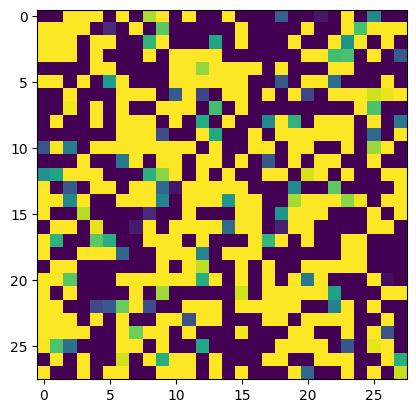

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  8.7532e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  3.0556e-01, -4.9462e-02,
          -2.7381e-04,  6.4783e-02, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.5951e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
           1.2029e-01, -1.9067e-03,  1.0535e+00, -1.7766e-02,  7.4769e-01,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  7.0865e-01,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04,  6.5554e-01,  1.0317e+00,


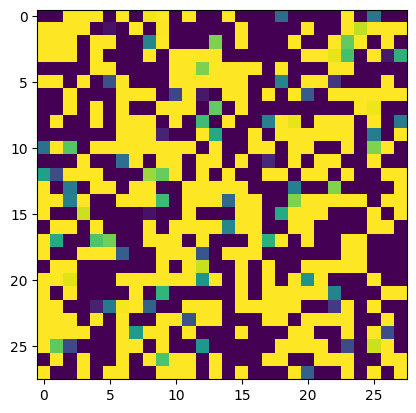

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  9.7791e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  3.4866e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           3.8578e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
           4.9745e-02, -1.9067e-03,  1.0535e+00, -1.7766e-02,  9.9321e-01,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  9.0384e-01,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04,  4.5743e-01,  1.0317e+00,


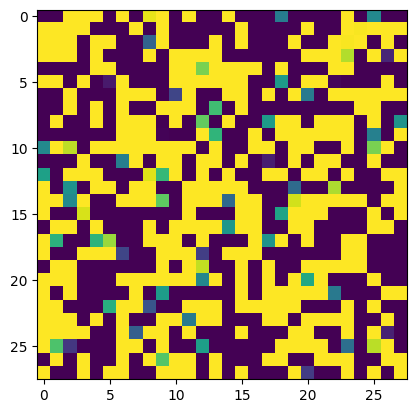

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  9.6123e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  4.2138e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.7063e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  9.9146e-01,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04,  3.1767e-01,  1.0317e+00,


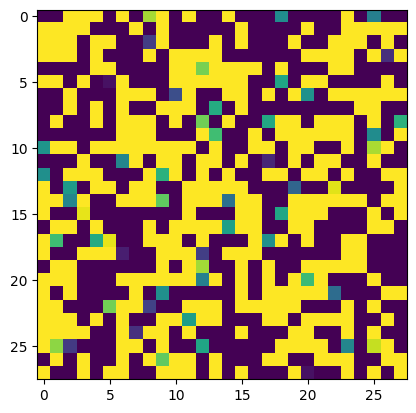

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  8.6639e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  4.8548e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.3169e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04,  1.8203e-01,  1.0317e+00,


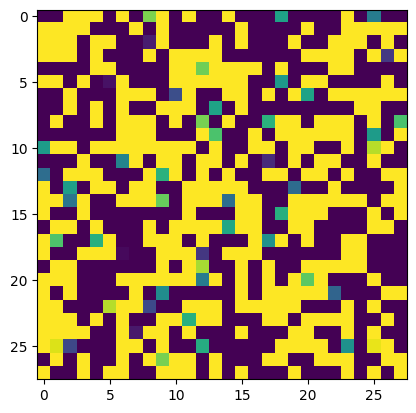

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  8.0185e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  5.7108e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.2127e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04,  8.0200e-02,  1.0317e+00,


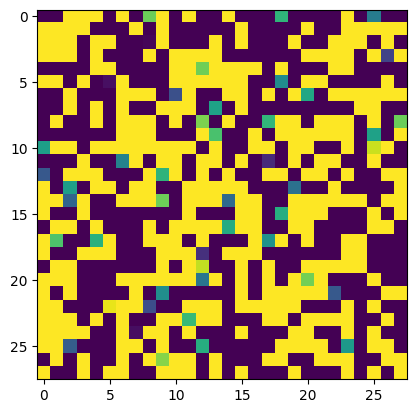

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  7.7646e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  6.5374e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.1924e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04,  1.5306e-02,  1.0317e+00,


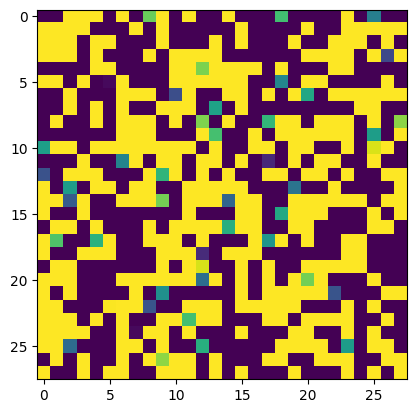

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  7.7076e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  6.9684e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.2754e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04, -3.8488e-05,  1.0317e+00,


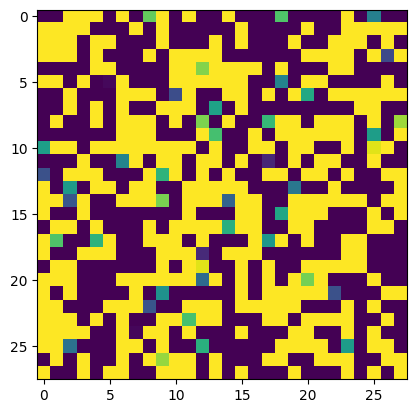

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  7.6383e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  7.2306e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.3623e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04, -3.8488e-05,  1.0317e+00,


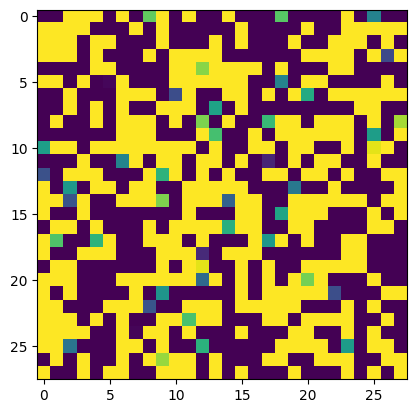

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  7.5872e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  7.3917e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.4258e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04, -3.8488e-05,  1.0317e+00,


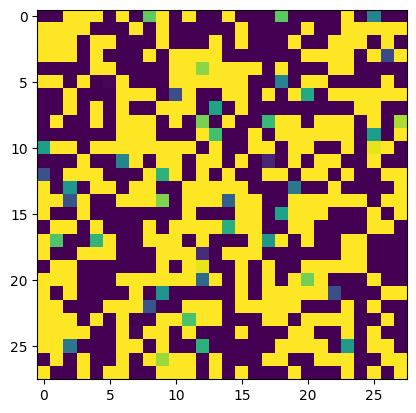

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  7.5445e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  7.4897e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.4729e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04, -3.8488e-05,  1.0317e+00,


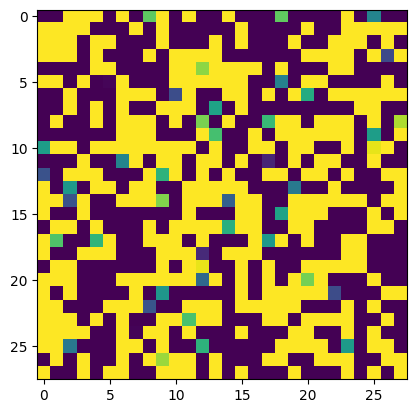

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  7.5104e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  7.5519e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.5060e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04, -3.8488e-05,  1.0317e+00,


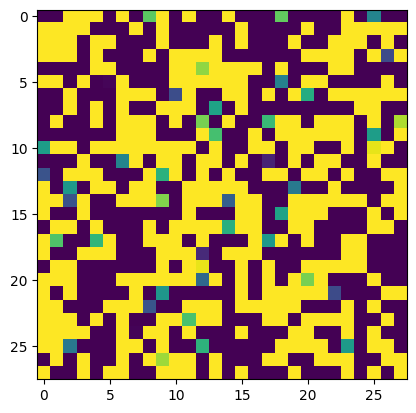

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  7.4836e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  7.5934e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.5291e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04, -3.8488e-05,  1.0317e+00,


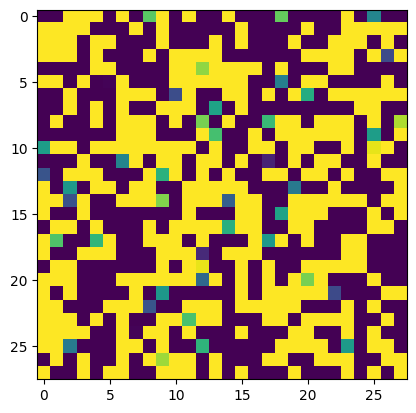

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  7.4629e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  7.6221e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.5450e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04, -3.8488e-05,  1.0317e+00,


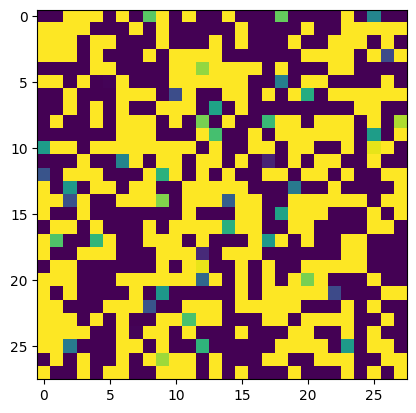

tensor([[[-1.1611e-03, -3.7871e-02,  1.0005e+00,  1.0007e+00,  1.2059e+00,
          -8.9204e-04,  1.3440e+00, -5.1969e-03,  7.4469e-01,  1.0013e+00,
          -6.7836e-02,  1.0009e+00, -1.0913e-03, -2.7092e-01,  1.0004e+00,
          -6.6051e-02, -4.0669e-02, -8.4607e-04,  7.6432e-01, -4.9462e-02,
          -2.7381e-04, -1.5922e-04, -2.1280e-05,  1.0009e+00, -8.8441e-04,
           4.5560e-01, -3.1268e-02, -1.8460e-04],
         [ 1.0005e+00,  1.0012e+00,  1.0004e+00,  1.0226e+00, -8.8825e-02,
          -1.0508e-04, -1.9067e-03,  1.0535e+00, -1.7766e-02,  1.0002e+00,
          -3.7137e-02, -6.9267e-02, -5.1616e-04, -5.7019e-05, -2.6042e-01,
           1.0007e+00, -6.8709e-05, -1.3352e-03, -5.6920e-02, -1.6557e-03,
           1.0173e+00, -8.0511e-04, -7.1328e-02,  1.0017e+00,  1.0001e+00,
           1.0019e+00,  1.0010e+00,  1.0032e+00],
         [ 1.0002e+00,  1.0005e+00,  1.0008e+00, -4.4022e-02,  1.0003e+00,
           1.1811e+00, -1.4977e-01, -1.7159e-04, -3.8488e-05,  1.0317e+00,


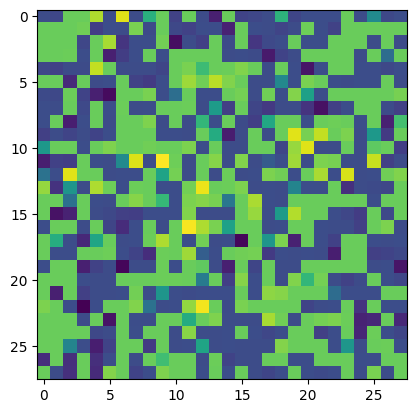

In [139]:
picTry = torch.rand((1,28, 28), requires_grad = True, device=device)
normalizer = nn.LayerNorm((28,28)).to(device)
optimizer = optim.Adam([picTry], lr = 0.01 )
relu = nn.ReLU().to(device)

for i in range(200000):
    optimizer.zero_grad()
    loss = torch.nn.CrossEntropyLoss()(bestModel((torch.clamp(picTry, min = 0, max = 1).to(device))-0.5),torch.tensor([8], device=device))
    loss.backward()
    optimizer.step()
    if i % 10000 == 0:
        imshow(256*torch.clamp(picTry, min = 0.001, max = 1)[0].cpu().detach().numpy())
        # imshow(nn.LayerNorm((28,28)).to(device)(picTry)[0].cpu().detach().numpy())
        print(picTry)
        print(loss.item())
imshow(256*picTry[0].cpu().detach().numpy())

## Problem 2: